# 5. Index Validation

Vulnerability index for heatwave hazard is most often validated against daily death cases counts during heatwaves. Unfortunately, currently there is no access to this data on LAU level in Latvia. However, there are records of annual crude death rate. Considering variable selection process, the index is assumed to be sensitive to annual crude death rate as well. For this example analysis annual crude death rate will be used. 

# Code setup

In [13]:
import os
import pandas as pd
import geopandas as gpd
import numpy as np

# Importing datasets

**Vulnerability Variables**

In [6]:
variables_dfs_by_year_path = os.path.join('output', 'variables_dfs_by_year')

variables_dfs_by_year = {} #saves variables's dfs into a dictionary
years_list = [] #saves the years into a list

for filename in os.listdir(variables_dfs_by_year_path):
    if 'variables_df' in filename and filename.endswith('.csv'):
        parts = filename.split('_')
        year = parts[2] 
        year = int(year.split('.')[0])
        file_path = os.path.join(variables_dfs_by_year_path, filename)
        variables_dfs_by_year[year] = pd.read_csv(file_path)
        years_list.append(year)
        

print("Years_list:", years_list)
for year in years_list:
    print("")
    print(f"\nDataframe for year {year}")
    display(variables_dfs_by_year[year].head())


Years_list: [2000, 2011, 2021]


Dataframe for year 2000


,LAU 2022,bath or shower,children 0-6,children 7-14,economically inactive,elderly,elderly women,low education,mean age,non-citizen,other citizen,owner occupied dwelling,piped water,pre-retired,roma,ru-citizen,sex ratio,toilet,unemployed,working age
0,Aizkraukles nov.,65.580131,7.0,13.0,31.045082,15.0,10.02,42.086146,37.0,11.0,2.0,66.158871,60.861466,23.28,0.221597,0.0,88.149016,53.696190,13.9,64.0
1,Alūksnes nov.,60.812454,8.0,14.0,39.735826,16.0,10.77,42.115920,37.0,6.0,1.0,73.605709,59.087446,22.20,0.140035,0.0,88.463928,45.439237,12.6,63.0
2,Augšdaugavas nov.,49.837456,6.0,12.0,38.823144,17.0,11.98,48.254272,39.0,15.0,4.0,71.878556,45.425158,23.82,0.456055,0.0,90.900512,40.940830,20.9,63.0
3,Balvu nov.,43.250760,7.0,13.0,44.292059,18.0,12.41,46.262952,39.0,5.0,1.0,80.122785,46.356780,23.21,0.414707,0.0,88.671241,43.024031,20.9,62.0
4,Bauskas nov.,71.633844,7.0,14.0,31.883377,13.0,8.92,45.779569,36.0,13.0,5.0,73.465649,71.869720,22.69,0.174822,0.0,89.599751,62.774555,13.9,66.0




Dataframe for year 2011


,LAU 2022,bath or shower,children 0-6,children 7-14,economically inactive,elderly,elderly women,low education,mean age,non-citizen,other citizen,owner occupied dwelling,piped water,pre-retired,roma,ru-citizen,sex ratio,toilet,unemployed,working age
0,Aizkraukles nov.,65.580131,6.0,8.0,45.757723,19.0,12.83,29.783436,41.0,8.0,0.0,71.541235,75.858353,27.33,0.223934,0.0,88.153622,99.180691,19.7,67.0
1,Alūksnes nov.,60.812454,6.0,8.0,46.871592,20.0,13.13,28.264722,41.0,4.0,0.0,59.265734,75.522987,26.12,0.000000,1.0,87.842111,99.586475,24.0,65.0
2,Augšdaugavas nov.,49.837456,6.0,7.0,52.881720,21.0,14.00,31.901500,43.0,13.0,1.0,77.185186,65.224283,28.66,0.609885,1.0,90.319441,98.590128,26.0,66.0
3,Balvu nov.,43.250760,6.0,8.0,49.359929,20.0,14.15,33.579996,42.0,4.0,0.0,68.255724,55.084460,27.86,0.398133,0.0,87.816405,94.227915,30.0,66.0
4,Bauskas nov.,71.633844,7.0,8.0,45.333601,17.0,11.57,33.929012,40.0,11.0,0.0,65.888748,81.684558,26.24,0.154976,0.0,89.899477,98.345931,21.5,69.0




Dataframe for year 2021


,LAU 2022,bath or shower,children 0-6,children 7-14,economically inactive,elderly,elderly women,low education,mean age,non-citizen,other citizen,owner occupied dwelling,piped water,pre-retired,roma,ru-citizen,sex ratio,toilet,unemployed,working age
0,Aizkraukles nov.,71.500337,7.0,8.0,43.384835,23.0,14.70,21.826150,44.0,6.0,0.0,63.463398,82.523631,29.39,0.2,0.0,91.916089,98.234114,9.0,63.0
1,Alūksnes nov.,67.795100,6.0,8.0,41.189390,23.0,15.11,29.940430,44.0,3.0,0.0,63.636364,83.496659,30.46,0.0,1.0,86.805930,99.005197,11.0,62.0
2,Augšdaugavas nov.,55.643254,5.0,6.0,44.606427,24.0,15.31,23.143354,46.0,10.0,1.0,66.676106,70.407686,33.66,0.7,3.0,98.431042,96.754146,13.6,65.0
3,Balvu nov.,48.811891,6.0,7.0,41.157965,22.0,14.84,20.602566,44.0,3.0,0.0,58.708052,62.042484,31.93,0.5,0.0,92.674030,90.592488,12.9,64.0
4,Bauskas nov.,76.446981,7.0,9.0,41.425632,20.0,12.68,26.158262,42.0,7.0,1.0,61.307564,86.374035,28.72,0.1,0.0,93.749710,98.079735,7.8,65.0


**Indexes' scores**

In [8]:
hvi_sovia_scores_path = os.path.join('output', 'HVI_SoVIA', 'HVI_SoVIA_scores')
hvi_aa_scores_path = os.path.join('output', 'HVI_AA', 'HVI_AA_scores')

hvi_sovia_dfs = {}
hvi_aa_dfs = {}
years_list = [] #saves the years into a list

for filename in os.listdir(hvi_sovia_scores_path ):
    if 'SoVIA' in filename and filename.endswith('.csv'):
        parts = filename.split('_')
        year = parts[3] 
        year = int(year.split('.')[0])
        file_path = os.path.join(hvi_sovia_scores_path, filename)
        hvi_sovia_dfs[year] = pd.read_csv(file_path)
        years_list.append(year)
        

print("Years_list:", years_list)
for year in years_list:
    print("")
    print(f"HVI SoVIA scores for {year}:")
    display(hvi_sovia_dfs[year].head())



for filename in os.listdir(hvi_aa_scores_path ):
    if 'AA' in filename and filename.endswith('.csv'):
        parts = filename.split('_')
        year = parts[3] 
        year = int(year.split('.')[0])
        file_path = os.path.join(hvi_aa_scores_path, filename)
        hvi_aa_dfs[year] = pd.read_csv(file_path)
        

for year in years_list:
    print("")
    print(f"HVI AA scores for {year}:")
    display(hvi_aa_dfs[year].head())

Years_list: [2000, 2011, 2021]

HVI SoVIA scores for 2000:


,LAU 2022,SoVI score,Normalized HVI SoVIA score
0,Aizkraukles nov.,0.882408,0.038833
1,Alūksnes nov.,1.168401,0.196846
2,Augšdaugavas nov.,4.767756,2.185515
3,Balvu nov.,1.214306,0.222209
4,Bauskas nov.,2.863601,1.133456



HVI SoVIA scores for 2011:


,LAU 2022,SoVI score,Normalized HVI SoVIA score
0,Aizkraukles nov.,-0.001309,-0.808732
1,Alūksnes nov.,-0.392959,-1.019894
2,Augšdaugavas nov.,5.324949,2.062978
3,Balvu nov.,3.482329,1.069509
4,Bauskas nov.,0.350868,-0.618852



HVI SoVIA scores for 2021:


,LAU 2022,SoVI score,Normalized HVI SoVIA score
0,Aizkraukles nov.,0.134876,-0.334020
1,Alūksnes nov.,-0.170561,-0.516624
2,Augšdaugavas nov.,3.053604,1.410931
3,Balvu nov.,3.325210,1.573309
4,Bauskas nov.,-0.481670,-0.702619



HVI AA scores for 2000:


,LAU 2022,HVI AA score,Normalized HVI AA score,HVI AA z score,Normalized HVI AA z score
0,Aizkraukles nov.,7.933822,0.510321,0.354921,0.054407
1,Alūksnes nov.,8.738134,0.637158,3.466581,0.531407
2,Augšdaugavas nov.,10.845996,0.969559,11.353637,1.740448
3,Balvu nov.,11.039032,1.000000,12.389603,1.899255
4,Bauskas nov.,7.436087,0.431830,-2.673728,-0.409867



HVI AA scores for 2011:


,LAU 2022,HVI AA score,Normalized HVI AA score,HVI AA z score,Normalized HVI AA z score
0,Aizkraukles nov.,7.537749,0.510126,-0.963161,-0.134784
1,Alūksnes nov.,8.592749,0.673403,3.446113,0.482248
2,Augšdaugavas nov.,10.631126,0.988871,10.341044,1.447122
3,Balvu nov.,10.496005,0.967959,12.328948,1.725309
4,Bauskas nov.,7.201211,0.458042,-2.989274,-0.418318



HVI AA scores for 2021:


,LAU 2022,HVI AA score,Normalized HVI AA score,HVI AA z score,Normalized HVI AA z score
0,Aizkraukles nov.,7.577255,0.435594,0.348758,0.056741
1,Alūksnes nov.,8.145309,0.548020,2.810990,0.457332
2,Augšdaugavas nov.,9.787334,0.872998,8.818171,1.434667
3,Balvu nov.,9.432382,0.802748,7.820504,1.272352
4,Bauskas nov.,7.132358,0.347543,-2.644042,-0.430171


**Crude death rate**

Crude death rate is normalized to z-scores with mean of 0 and standard deviation of 1. 

In [9]:
from sklearn.preprocessing import StandardScaler

death_rate_path = os.path.join("input files", "crude death rate.csv")

if not os.path.exists(death_rate_path):
    raise FileNotFoundError(f"The required file does not exist: {death_rate_path}")

death_rate_df = pd.read_csv(death_rate_path)*
death_rate_by_year = {}
scaler = StandardScaler()

# Creating separate dataframes for each year and normalizing the death rate
for year in years_list:
    df_pivot = death_rate_df.pivot(index='LAU 2022', columns='variable', values=str(year))
    if 'death rate' in df_pivot.columns:
        df_pivot['Normalized death rate'] = scaler.fit_transform(df_pivot[['death rate']])
    death_rate_by_year[year] = df_pivot

for year in years_list:
    print(f"Death rate dataset for the year {year}:")
    display(death_rate_by_year[year].head())

Death rate dataset for the year 2000:


variable,death rate,Normalized death rate
LAU 2022,,
Aizkraukles nov.,13.841180,0.000268
Alūksnes nov.,14.028150,0.066903
Augšdaugavas nov.,17.762910,1.397948
Balvu nov.,17.860080,1.432579
Bauskas nov.,13.086249,-0.268784


Death rate dataset for the year 2011:


variable,death rate,Normalized death rate
LAU 2022,,
Aizkraukles nov.,16.292303,0.752504
Alūksnes nov.,14.716270,0.205963
Augšdaugavas nov.,20.059571,2.058928
Balvu nov.,19.045978,1.707431
Bauskas nov.,14.002259,-0.041644


Death rate dataset for the year 2021:


variable,death rate,Normalized death rate
LAU 2022,,
Aizkraukles nov.,20.336198,0.279574
Alūksnes nov.,21.515571,0.540013
Augšdaugavas nov.,28.280145,2.033824
Balvu nov.,24.685434,1.240009
Bauskas nov.,17.872607,-0.264458


C:\Users\Niels\AppData\Local\Temp\ipykernel_6944\1145715330.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  location_name = merged_df.iloc[i][0]


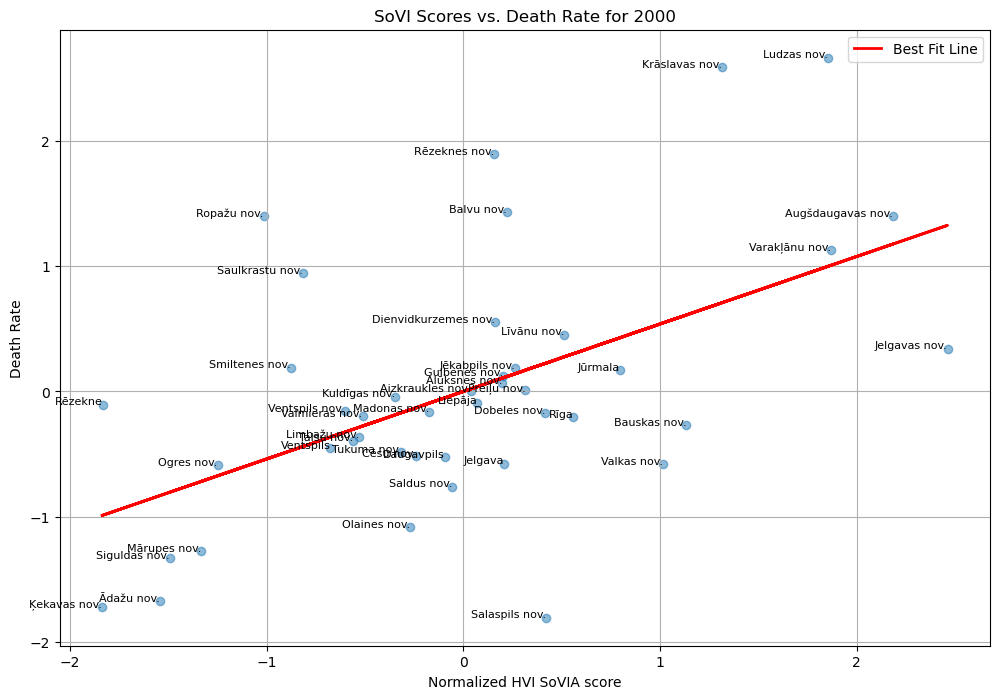

YEAR 2000
R-squared: 0.290
Coefficients:
const                        -1.942890e-16
Normalized HVI SoVIA score    5.389315e-01
dtype: float64
P-values:
const                         1.000000
Normalized HVI SoVIA score    0.000193
dtype: float64




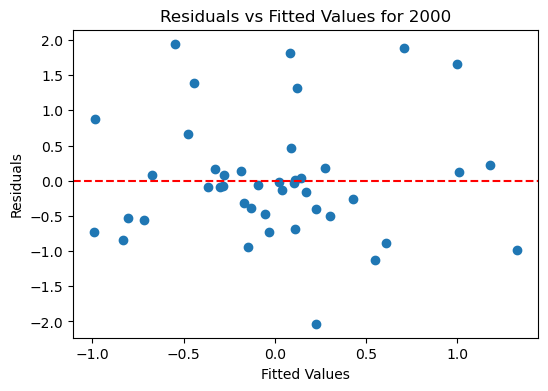

<Figure size 600x400 with 0 Axes>

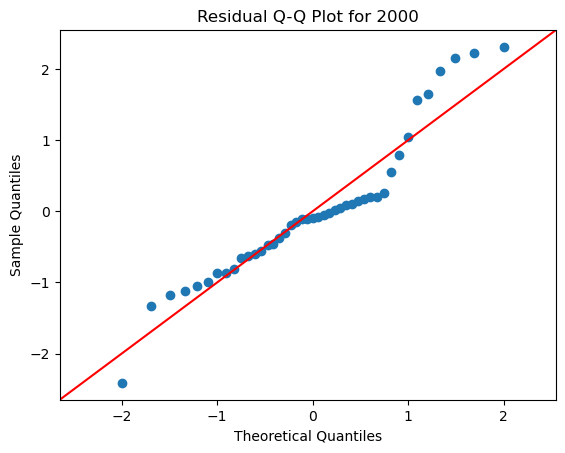

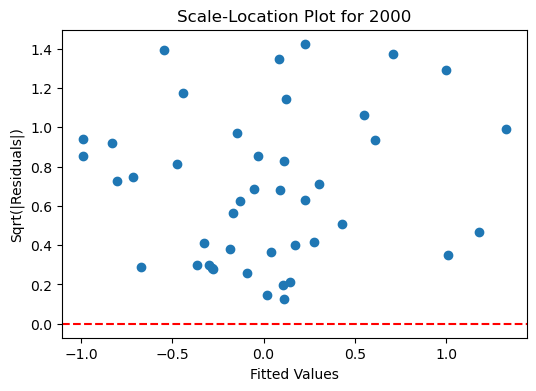

<Figure size 600x400 with 0 Axes>

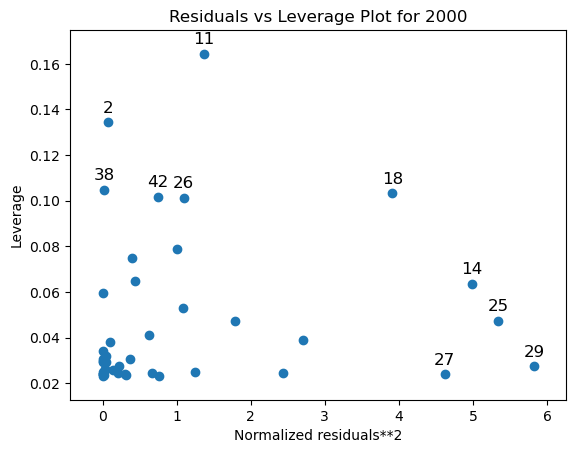

C:\Users\Niels\AppData\Local\Temp\ipykernel_6944\1145715330.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  location_name = merged_df.iloc[i][0]


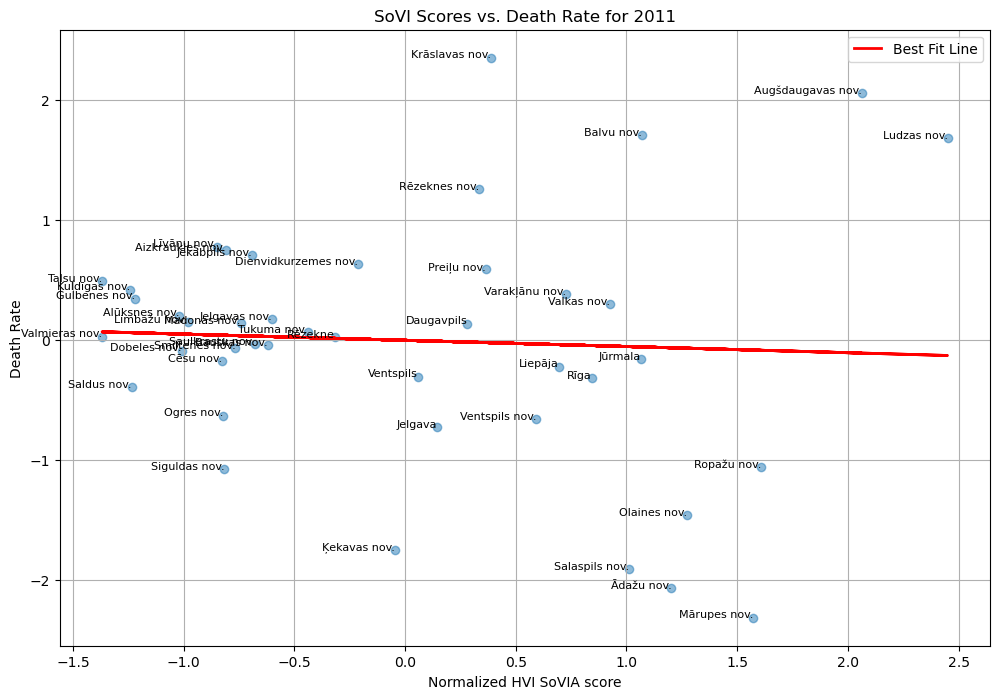

YEAR 2011
R-squared: 0.003
Coefficients:
const                        -4.718448e-16
Normalized HVI SoVIA score   -5.163113e-02
dtype: float64
P-values:
const                         1.000000
Normalized HVI SoVIA score    0.742299
dtype: float64




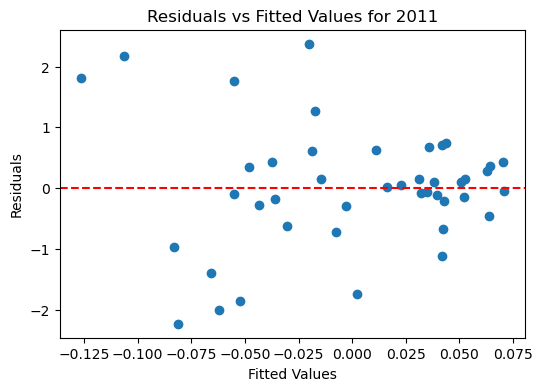

<Figure size 600x400 with 0 Axes>

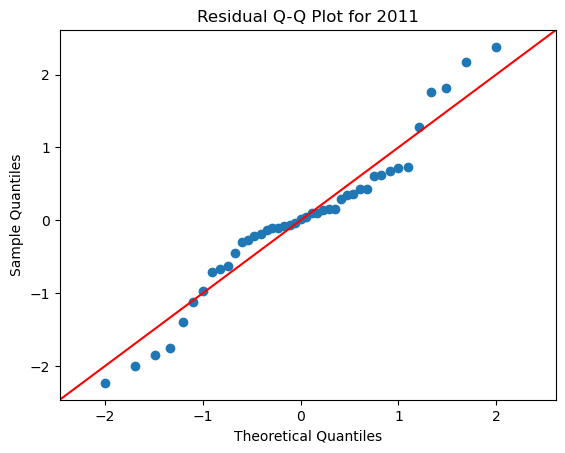

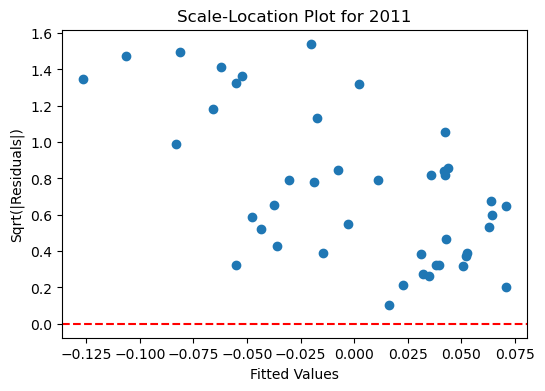

<Figure size 600x400 with 0 Axes>

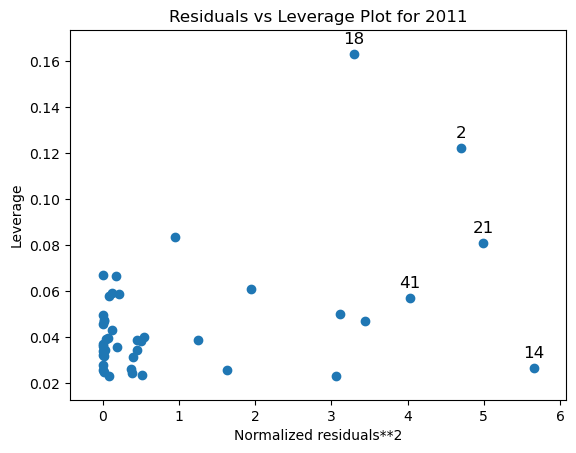

C:\Users\Niels\AppData\Local\Temp\ipykernel_6944\1145715330.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  location_name = merged_df.iloc[i][0]


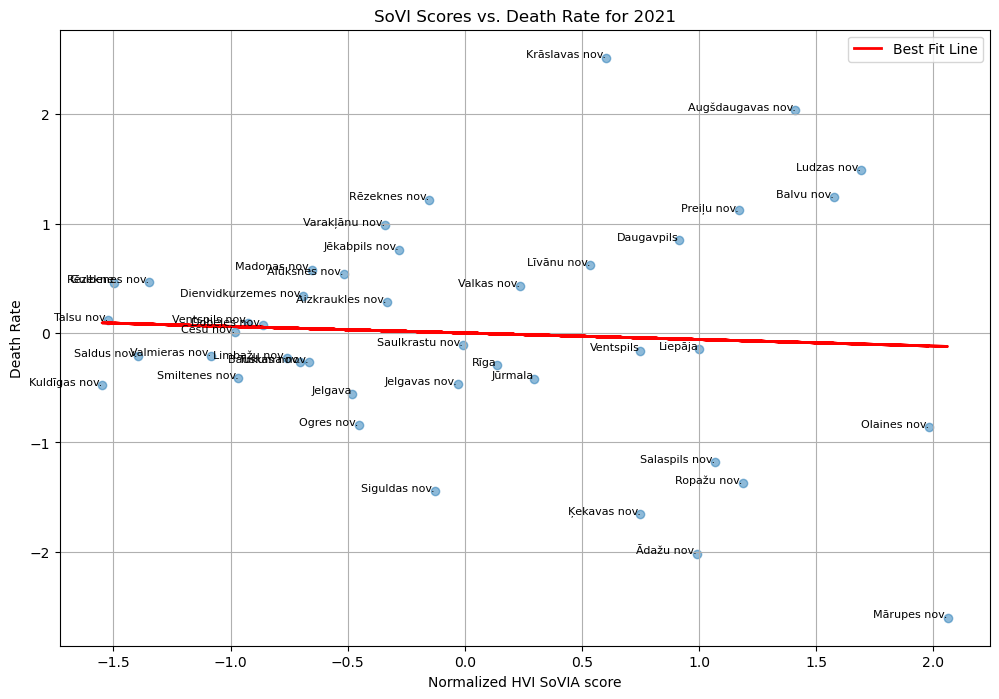

YEAR 2021
R-squared: 0.004
Coefficients:
const                         4.163336e-16
Normalized HVI SoVIA score   -5.972474e-02
dtype: float64
P-values:
const                         1.000000
Normalized HVI SoVIA score    0.703618
dtype: float64




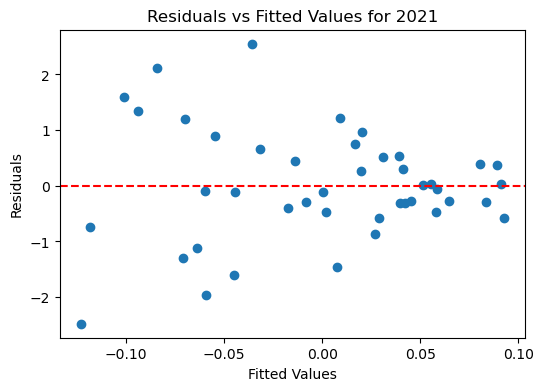

<Figure size 600x400 with 0 Axes>

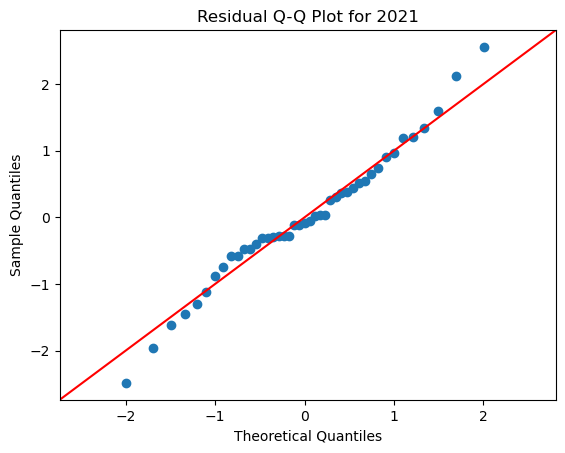

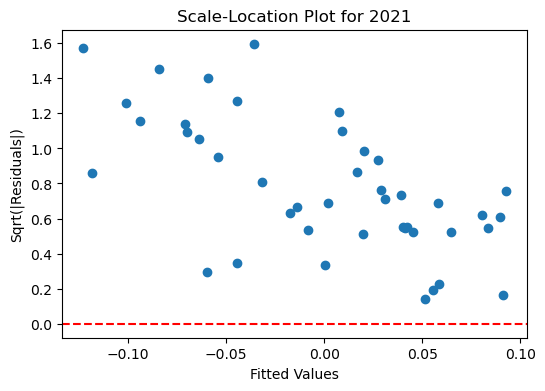

<Figure size 600x400 with 0 Axes>

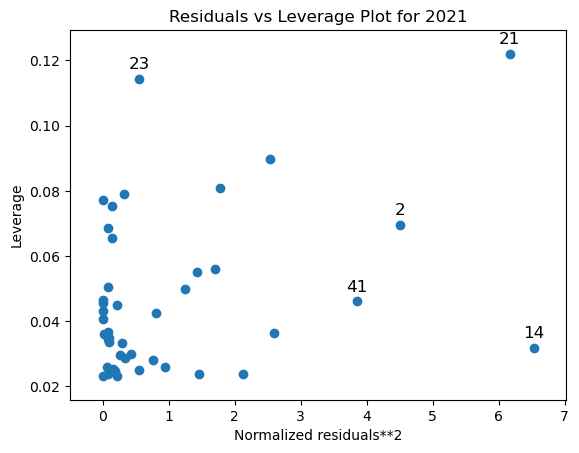

In [14]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

for year in hvi_sovia_dfs:
    # Merge the dataframes
    merged_df = hvi_sovia_dfs[year].merge(death_rate_by_year[year], on='LAU 2022')
    
    # Scatter plot with labels
    plt.figure(figsize=(12, 8)) 
    plt.scatter(merged_df['Normalized HVI SoVIA score'], merged_df['Normalized death rate'], alpha=0.5)  

    for i in range(len(merged_df)):
        location_name = merged_df.iloc[i][0]  
        x = merged_df['Normalized HVI SoVIA score'].iloc[i]
        y = merged_df['Normalized death rate'].iloc[i]
        plt.text(x, y, location_name, fontsize=8, ha='right') 

    # Add best fit line
    X = sm.add_constant(merged_df['Normalized HVI SoVIA score'])
    y = merged_df['Normalized death rate']
    model = sm.OLS(y, X).fit()
    plt.plot(merged_df['Normalized HVI SoVIA score'], model.fittedvalues, color='red', linewidth=2, label='Best Fit Line')
    plt.legend()

    plt.title(f'SoVI Scores vs. Death Rate for {year}')
    plt.xlabel('Normalized HVI SoVIA score')
    plt.ylabel('Death Rate')
    plt.grid(True)
    plt.show()

    # Print model summary
    print(f"YEAR {year}")
    print(f"R-squared: {model.rsquared:.3f}")
    print(f"Coefficients:\n{model.params}")
    print(f"P-values:\n{model.pvalues}")
    print("\n")


    # Residual analysis
    residuals = model.resid
    fitted = model.fittedvalues

    # Residuals vs Fitted
    plt.figure(figsize=(6, 4))
    plt.scatter(fitted, residuals)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.title(f'Residuals vs Fitted Values for {year}')
    plt.xlabel('Fitted Values')
    plt.ylabel('Residuals')
    plt.show()

    # Normal Q-Q Plot
    plt.figure(figsize=(6, 4))
    sm.qqplot(residuals, line='45', fit=True)
    plt.title(f'Residual Q-Q Plot for {year}')
    plt.show()

    # Scale-Location Plot
    plt.figure(figsize=(6, 4))
    plt.scatter(fitted, np.sqrt(np.abs(residuals)))
    plt.axhline(y=0, color='r', linestyle='--')
    plt.title(f'Scale-Location Plot for {year}')
    plt.xlabel('Fitted Values')
    plt.ylabel('Sqrt(|Residuals|)')
    plt.show()

    # Residuals vs Leverage
    from statsmodels.graphics.regressionplots import plot_leverage_resid2
    plt.figure(figsize=(6, 4))
    plot_leverage_resid2(model)
    plt.title(f'Residuals vs Leverage Plot for {year}')
    plt.show()

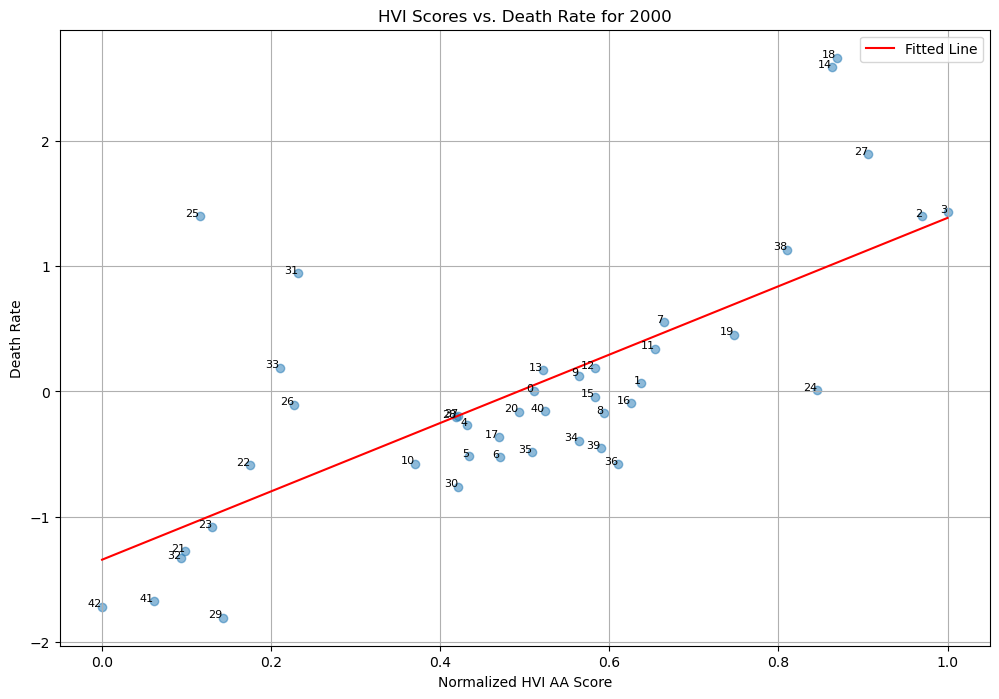

YEAR 2000
YEAR 2000
R-squared: 0.499
Coefficients:
const                     -1.343219
Normalized HVI AA score    2.729274
dtype: float64
P-values:
const                      1.348615e-06
Normalized HVI AA score    1.221447e-07
dtype: float64




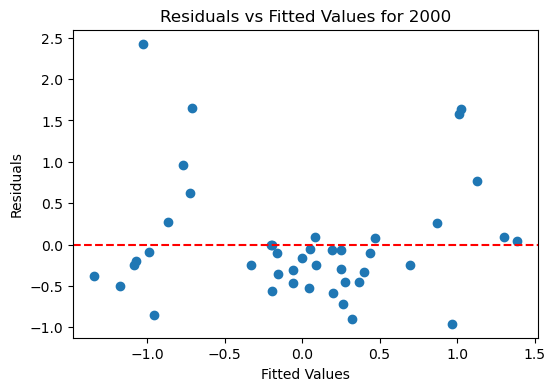

<Figure size 600x400 with 0 Axes>

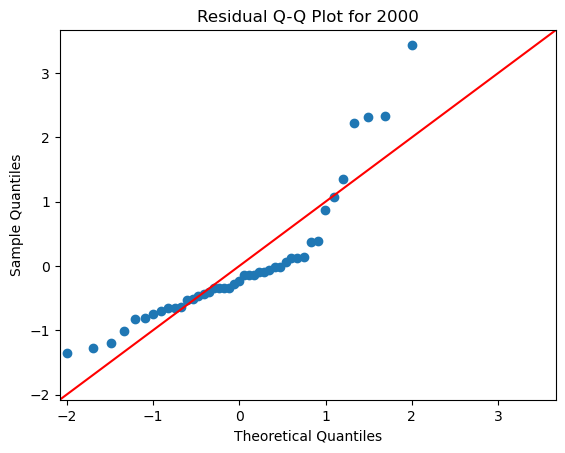

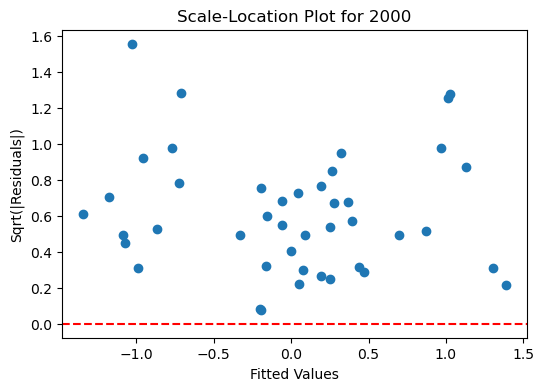

<Figure size 600x400 with 0 Axes>

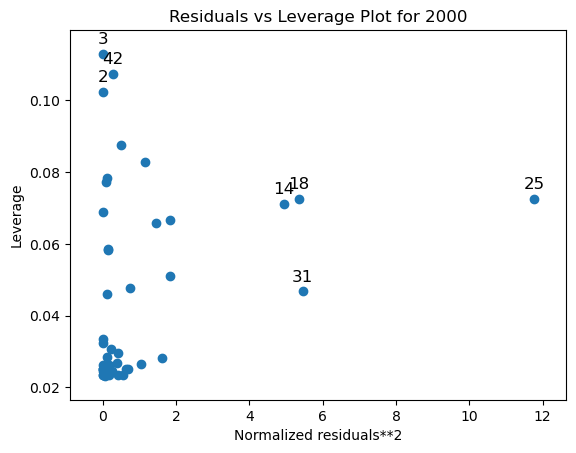

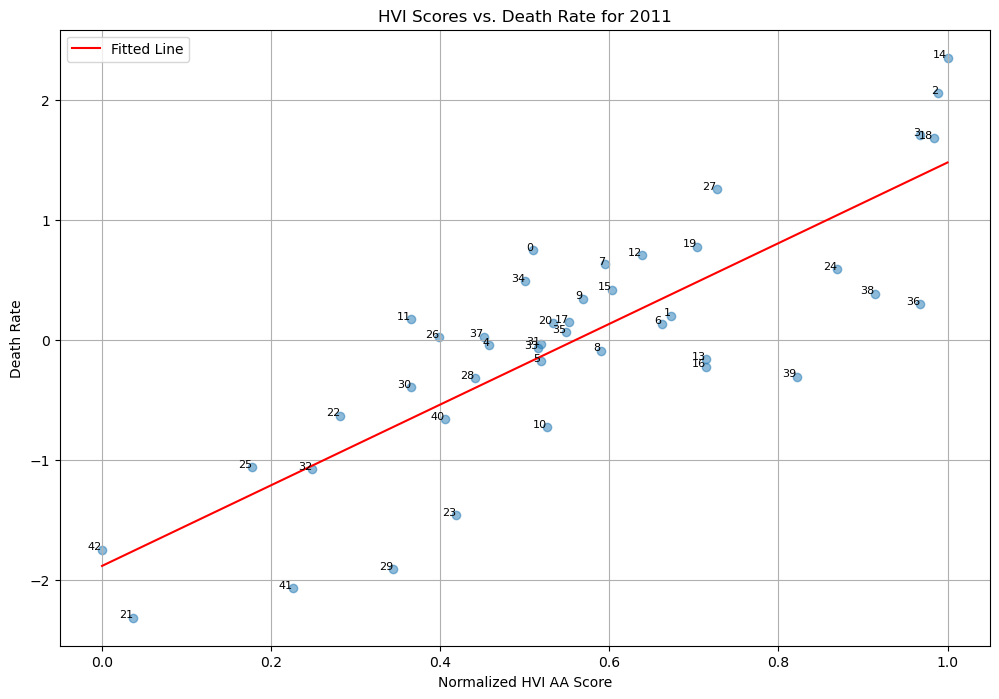

YEAR 2011
YEAR 2011
R-squared: 0.676
Coefficients:
const                     -1.880384
Normalized HVI AA score    3.362454
dtype: float64
P-values:
const                      1.510988e-10
Normalized HVI AA score    1.397045e-11
dtype: float64




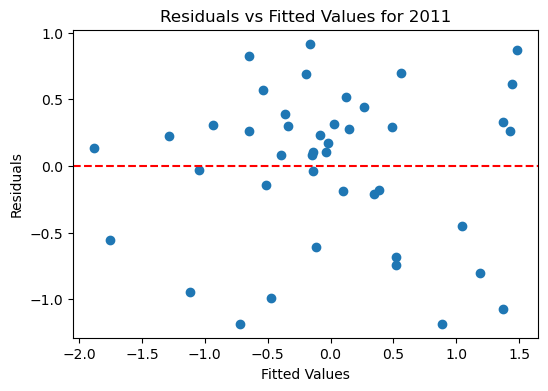

<Figure size 600x400 with 0 Axes>

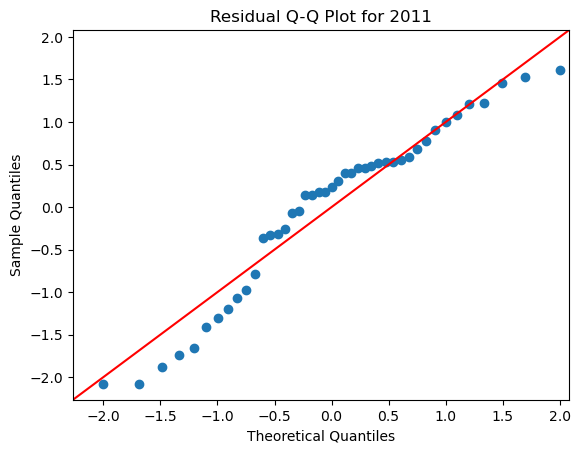

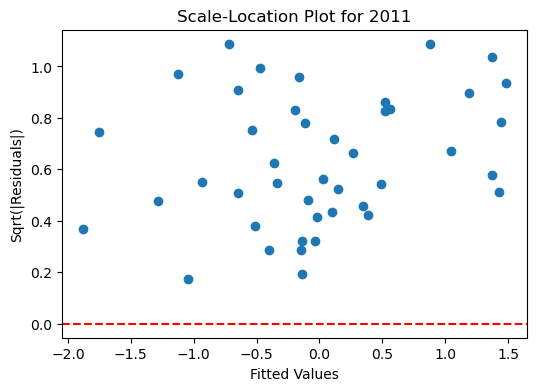

<Figure size 600x400 with 0 Axes>

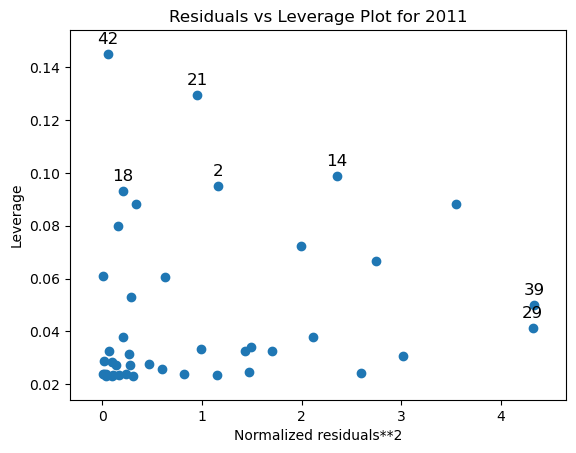

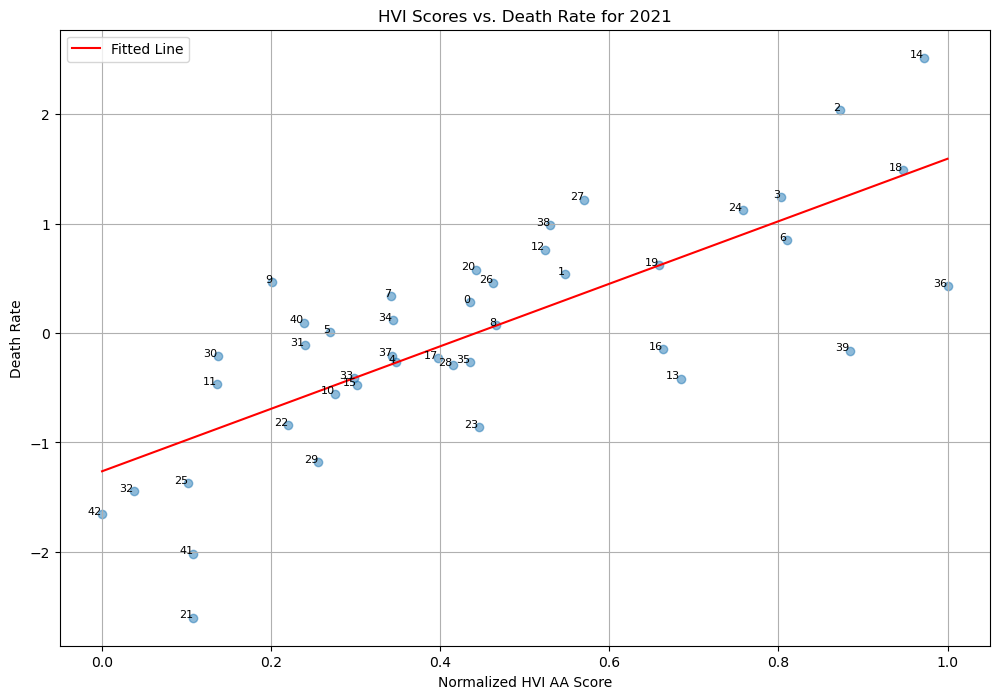

YEAR 2021
YEAR 2021
R-squared: 0.577
Coefficients:
const                     -1.263854
Normalized HVI AA score    2.856045
dtype: float64
P-values:
const                      1.140870e-07
Normalized HVI AA score    3.550948e-09
dtype: float64




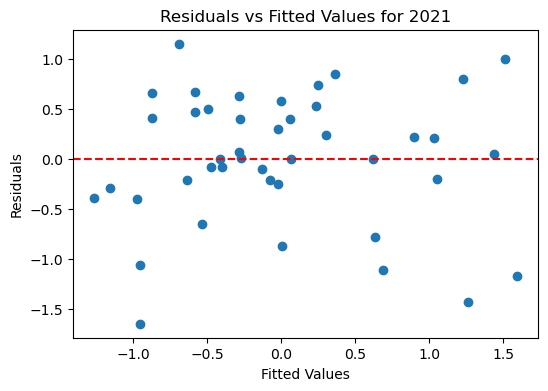

<Figure size 600x400 with 0 Axes>

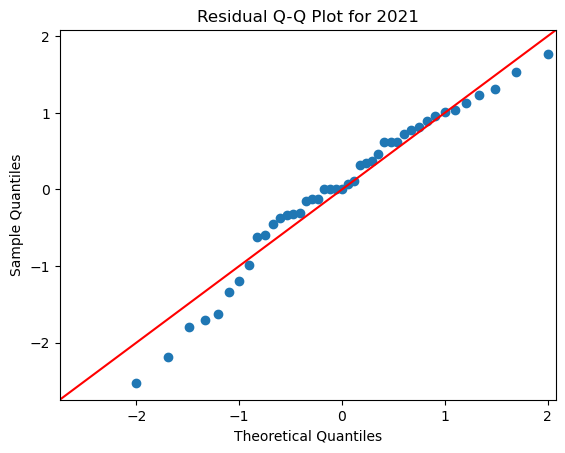

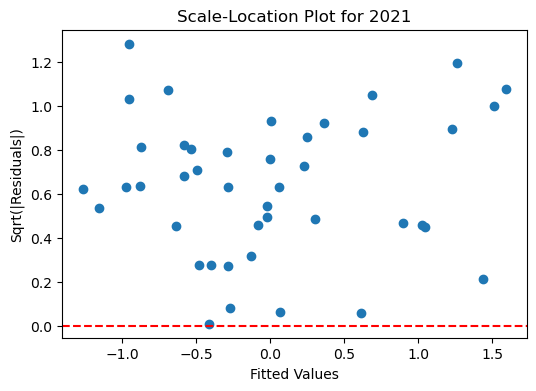

<Figure size 600x400 with 0 Axes>

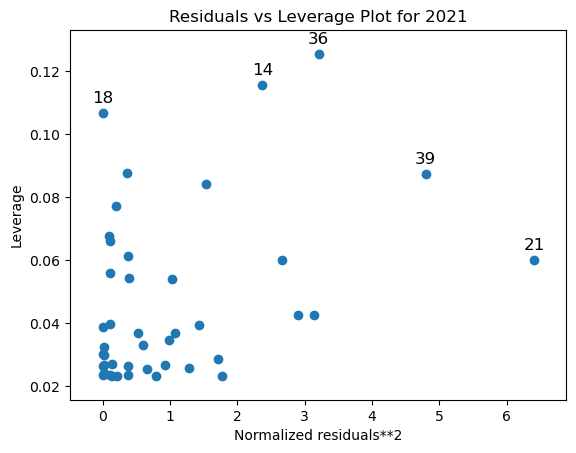

In [15]:
import statsmodels.api as sm

for year in hvi_aa_dfs:
    if year in death_rate_by_year:
        merged_df = hvi_aa_dfs[year].merge(death_rate_by_year[year], on='LAU 2022')

        #Distribution plot
        plt.figure(figsize=(12, 8))
        plt.scatter(merged_df['Normalized HVI AA score'], merged_df['Normalized death rate'], alpha=0.5)
        for i in range(len(merged_df)):
            location_name = merged_df.index[i]  
            x = merged_df['Normalized HVI AA score'].iloc[i]
            y = merged_df['Normalized death rate'].iloc[i]
            plt.text(x, y, location_name, fontsize=8, ha='right')
        
        #Regression analysis
        X = sm.add_constant(merged_df['Normalized HVI AA score'])  
        y = merged_df['Normalized death rate']
        
        # The linear regression model
        model = sm.OLS(y, X).fit()
        # Calculating fitted values for a line of best fit
        fitted_values = model.predict(X)
        
        # Sort the values for plotting a red fitted line
        sorted_order = np.argsort(merged_df['Normalized HVI AA score'])
        plt.plot(merged_df['Normalized HVI AA score'].iloc[sorted_order], fitted_values[sorted_order], 'r-', label='Fitted Line') 

        plt.title(f'HVI Scores vs. Death Rate for {year}')
        plt.xlabel('Normalized HVI AA Score')
        plt.ylabel('Death Rate')
        plt.grid(True)
        plt.legend()
        plt.show()

        print(f"YEAR {year}")
        #print(model.summary())
        print(f"YEAR {year}")
        print(f"R-squared: {model.rsquared:.3f}")
        print(f"Coefficients:\n{model.params}")
        print(f"P-values:\n{model.pvalues}")
        print("\n")


        # Residual analysis
        residuals = model.resid
        fitted = model.fittedvalues

        # Residuals vs Fitted
        plt.figure(figsize=(6, 4))
        plt.scatter(fitted, residuals)
        plt.axhline(y=0, color='r', linestyle='--')
        plt.title(f'Residuals vs Fitted Values for {year}')
        plt.xlabel('Fitted Values')
        plt.ylabel('Residuals')
        plt.show()

        # Normal Q-Q Plot
        plt.figure(figsize=(6, 4))
        sm.qqplot(residuals, line='45', fit=True)
        plt.title(f'Residual Q-Q Plot for {year}')
        plt.show()

        # Scale-Location Plot
        plt.figure(figsize=(6, 4))
        plt.scatter(fitted, np.sqrt(np.abs(residuals)))
        plt.axhline(y=0, color='r', linestyle='--')
        plt.title(f'Scale-Location Plot for {year}')
        plt.xlabel('Fitted Values')
        plt.ylabel('Sqrt(|Residuals|)')
        plt.show()

        # Residuals vs Leverage
        from statsmodels.graphics.regressionplots import plot_leverage_resid2
        plt.figure(figsize=(6, 4))
        plot_leverage_resid2(model)
        plt.title(f'Residuals vs Leverage Plot for {year}')
        plt.show()


# Risk mapping validation

In progress